In [1]:
# Imports
import pykep as pk
import pygmo as pg
import numpy as np

# Plotting imports
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
# We define the optimization problem
udp = pk.trajopt.pl2pl_N_impulses(
    start=pk.planet.jpl_lp('earth'),
    target=pk.planet.jpl_lp('venus'),
    N_max=3,
    tof=[100., 1000.],
    vinf=[0., 4],
    phase_free=False,
    multi_objective=False,
    t0=[pk.epoch(0), pk.epoch(1000)])
# All pykep problems in the module trajopt are compatible with pygmo.
# So we create a pygmo problem from the pykep udp (User Defined Problem)
prob = pg.problem(udp)
print(prob)

Problem name: <class 'pykep.trajopt._pl2pl_N_impulses.pl2pl_N_impulses'>
	C++ class name: pybind11::object

	Global dimension:			7
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [0, 100, 0.001, 0, 0, ... ]
	Upper bounds: [1000, 1000, 0.999, 1, 1, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [ ]:
# Here we define the solution strategy, which in this simple case is to use
# Covariance Matrix adaptation Evolutionary Strategy (CMA-ES)
uda = pg.cmaes(gen=1000, force_bounds = True)
algo = pg.algorithm(uda)
# Here we activate some degree of screen output (will only show in the terminal)
algo.set_verbosity(10)
# We construct a random population of 20 individuals (the initial guess)
pop = pg.population(prob, size = 20, seed = 123)
# We solve the problem
pop = algo.evolve(pop)

CMAES 4 PaGMO: 
mu: 10 - lambda: 20 - mueff: 5.9388 - N: 7
cc: 0.38186 - cs: 0.442549 - c1: 0.0267277 - cmu: 0.0944846 - sigma: 0.5 - damps: 1.44255 - chiN: 2.55383

   Gen:        Fevals:          Best:            dx:            df:         sigma:
      1              0        9706.34        3769.03         818649            0.5
     11            200          13028        519.431        60185.3       0.220099
     21            400        12566.7        251.312        83096.9       0.190645
     31            600        8205.31        345.533        73066.5       0.119585
     41            800        6324.99        19.9509        79407.3       0.100756
     51           1000         6197.9        76.7625        8476.68      0.0872098
     61           1200        6125.84         44.778        17234.5      0.0431136
     71           1400        6065.51        1.86528        1480.25      0.0278879
     81           1600        6065.25        14.6143        157.771      0.0240096
    

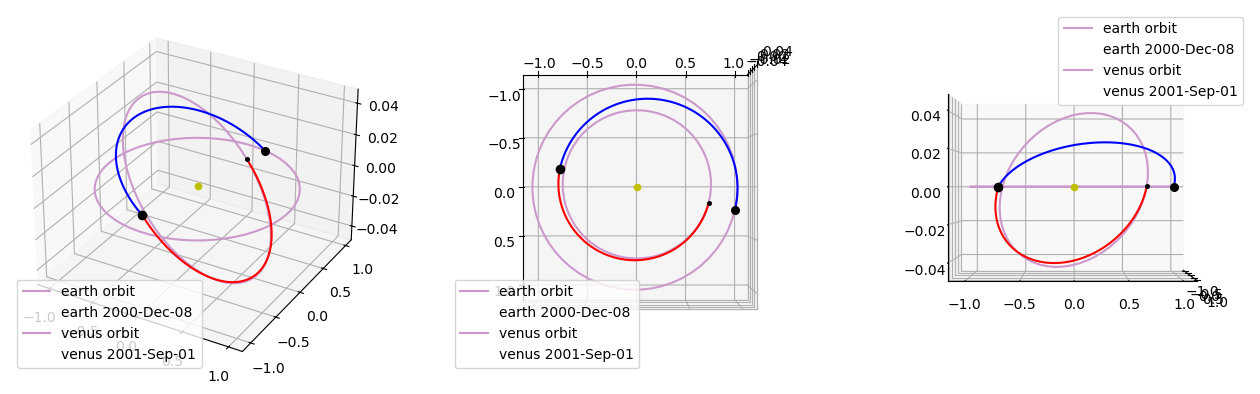

In [4]:
# Plot our trajectory
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax1 = udp.plot(pop.champion_x, axes = ax1)
ax2 = udp.plot(pop.champion_x, axes = ax2)
ax2.view_init(elev=90, azim=0)
ax3 = udp.plot(pop.champion_x, axes = ax3)
ax3.view_init(elev=0, azim=0)